IMPORTING THE LIBRARIES

In [24]:
import numpy as np
import pandas as pd
import os
import pickle
import tensorflow as tf 
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from datetime import datetime

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from keras.utils import to_categorical
from keras.utils import np_utils

In [25]:
# path of directory
cifar10_dir = "Desktop/cifar-10-batches-py/"

In [26]:
#to unpickle the data batch to obtain the features an labels
def load_batch(data_dir, batch_id):
    with open(data_dir + '/data_batch_' + str(batch_id), mode='rb') as file:
        batch = pickle.load(file, encoding='latin1')
    features = batch['data']
    labels = batch['labels']
    return features, labels

In [27]:
n_batches = 5
for batch_i in range(1, n_batches + 1):
        features.append(pd.DataFrame(data[b'data'])) 
        labels = load_batch(cifar10_dir, batch_i)

In [28]:
#loading the first data batch
features, labels = load_batch(cifar10_dir, 1)
#label data is a list of 10,000 numbers ranging from 0 to 9,corresponds to each of 10 classes in dataset.

In [29]:
#reshaping the features for future purpose
features1 = features.reshape((len(features), 3, 32, 32)).transpose(0, 2, 3, 1)

In [30]:
def labelNames():
    label_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return label_names

EXPLORING THE DATA

In [31]:
def display_stats_of_data(cifar10_dir, batch_id, sample_id):
    features, labels = load_batch(cifar10_dir, batch_id)
    features1 = features.reshape((len(features), 3, 32, 32)).transpose(0, 2, 3, 1)

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))
    
    label_names = labelNames()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))
    
    sample_image = features1[sample_id]
    sample_label = labels[sample_id]
    
    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))
    
    plt.imshow(sample_image, interpolation='bilinear')


Stats of batch #3:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 994
Label Counts of [1](AUTOMOBILE) : 1042
Label Counts of [2](BIRD) : 965
Label Counts of [3](CAT) : 997
Label Counts of [4](DEER) : 990
Label Counts of [5](DOG) : 1029
Label Counts of [6](FROG) : 978
Label Counts of [7](HORSE) : 1015
Label Counts of [8](SHIP) : 961
Label Counts of [9](TRUCK) : 1029

Example of Image 400:
Image - Min Value: 1 Max Value: 249
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


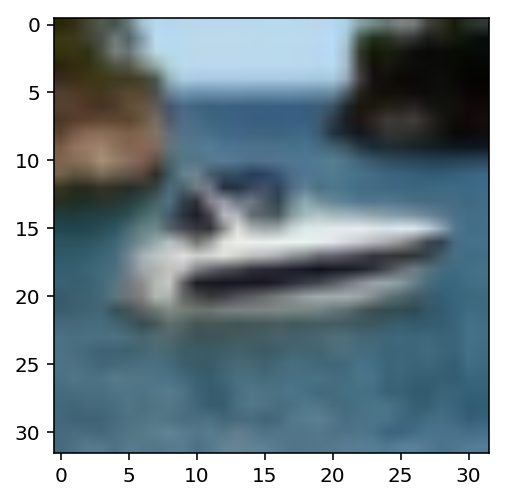

In [32]:
batch_id = 3
sample_id = 400
num_classes=10
display_stats_of_data(cifar10_dir, batch_id, sample_id)

PRE-PROCESSING THE DATA

In [33]:
#data is split using train_test_split
train_x, test_x, train_y, test_y = train_test_split(features,labels, test_size=0.1, random_state=42) 
print('X_train shape:', train_x.shape)
print(train_x.shape[0], 'is our train samples')
print(test_x.shape[0], 'is our test samples')

X_train shape: (9000, 3072)
9000 is our train samples
1000 is our test samples


In [34]:
#here we are normalizing the data ie we scale the data
train_x = train_x.astype('float32')
test_x = test_x.astype('float32')
train_x /= 255
test_x /= 255

In [35]:
#Feature Scaling using standard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(train_x.astype(np.float32))
x_test_scaled = scaler.fit_transform(test_x.astype(np.float32))

BUILDING THE MODEL USING DNN CLASSIFIER

In [36]:
config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
# random seed is set for consistency between reruns

feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(x_train_scaled)
dnn_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072, 3072], n_classes=10, 
                                         feature_columns=feature_columns, config=config)

dnn_clf = tf.contrib.learn.SKCompat(dnn_clf) # to be compatible with sklearn
dnn_clf.fit(x_train_scaled, train_y, batch_size=100, steps=1000)

INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1282079b0>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpe8yj25jy'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/dp

SKCompat()

In [37]:
#predicting model
y_pred = dnn_clf.predict(x_test_scaled)
print(y_pred.keys())
accuracy_score(test_y, y_pred['classes']) #accuracy score

INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpe8yj25jy/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
dict_keys(['logits', 'probabilities', 'classes'])


0.512

In [38]:
print(classification_report(val_y, y_pred['classes']))

              precision    recall  f1-score   support

           0       0.52      0.47      0.49       104
           1       0.63      0.61      0.62       114
           2       0.37      0.43      0.40        86
           3       0.37      0.33      0.35       100
           4       0.49      0.42      0.45       102
           5       0.37      0.31      0.34        93
           6       0.42      0.71      0.53        83
           7       0.63      0.54      0.58        97
           8       0.63      0.72      0.67       116
           9       0.64      0.55      0.59       105

   micro avg       0.51      0.51      0.51      1000
   macro avg       0.51      0.51      0.50      1000
weighted avg       0.52      0.51      0.51      1000



In [ ]:
confusion_matrix(val_y, y_pred, labels=None, sample_weight=None)

In [42]:
#learning curve
Train_size_list_5ep = []
Train_error_list_5ep = []
test_error_list_5ep = []
Train_time_list_5ep = []
test_time_list_5ep = []

from sklearn.model_selection import train_test_split

for j in [ 0.999, 0.995, 0.99,0.985,0.98, 0.975,0.97, 0.96,0.95, 0.94, 0.9, 0.8, 0.7, 0.6, 
          0.5, 0.4, 0.2, 0.1, 0.001, 0]:

    X_train_scaled_partial, X_noneed, y_train_partial, y_noneed  = train_test_split(x_train_scaled, train_y, 
                                                                        test_size = j, random_state = 42)
    y_train_partial = np.array(y_train_partial)
    print('Train_set_size:', y_train_partial.shape[0])
    Train_size_list_5ep.append(y_train_partial.shape[0])
    
    
    config = tf.contrib.learn.RunConfig(tf_random_seed=42) 
    feature_columns = tf.contrib.learn.infer_real_valued_columns_from_input(X_train_scaled_partial)
    
    dnn_1_clf = tf.contrib.learn.DNNClassifier(hidden_units=[3072], n_classes=10, 
                                               feature_columns=feature_columns, config=config)
    dnn_1_clf = tf.contrib.learn.SKCompat(dnn_1_clf) #### to be compatible with sklearn
    
    
    start=datetime.now()
    dnn_1_clf.fit(X_train_scaled_partial, y_train_partial, batch_size=128, steps=((1-j)*1100*5) )
    Train_elapse = (datetime.now()-start).total_seconds()
    print('dnn_1_clf training time', Train_elapse)
    Train_time_list_5ep.append(Train_elapse)
    
    y_train_partial_pred = dnn_1_clf.predict(X_train_scaled_partial) #return dictionary
    Train_error = 1 - accuracy_score(y_train_partial, y_train_partial_pred['classes'])

    print(type(y_train_partial_pred))
    
    start=datetime.now()
    y_test_pred =  dnn_1_clf.predict(x_test_scaled)
    
    test_elapse = (datetime.now()-start).total_seconds()
    
    test_time_list_5ep.append(test_elapse)
    
    test_error = 1 - accuracy_score(test_y, y_test_pred['classes'])
      
    
    print('Train error, test_error',  Train_error, '/', test_error)
                                   
    Train_error_list_5ep.append(Train_error)
    test_error_list_5ep.append(test_error)
    
print("Train_size_list: ", Train_size_list_5ep)
print("Train_error_list: ", Train_error_list_5ep)
print("Val_error_list: ", test_error_list_5ep)
print("Train_time_list: ", Train_time_list_5ep)
print("Val_time_list: ", test_time_list_5ep)   

Train_set_size: 9
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12530dd30>, '_master': '', '_num_ps_replicas': 0, '_num_worker_replicas': 0, '_environment': 'local', '_is_chief': True, '_evaluation_master': '', '_train_distribute': None, '_eval_distribute': None, '_device_fn': None, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_tf_random_seed': 42, '_save_summary_steps': 100, '_save_checkpoints_secs': 600, '_log_step_count_steps': 100, '_protocol': None, '_session_config': None, '_save_checkpoints_steps': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_model_dir': '/var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpk0xdp2dp'}
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into 

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmp1qi5ghuj/model.ckpt.
INFO:tensorflow:loss = 2.7122192, step = 1
INFO:tensorflow:global_step/sec: 10.3572
INFO:tensorflow:loss = 0.0016141308, step = 101 (9.662 sec)
INFO:tensorflow:Saving checkpoints for 111 into /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmp1qi5ghuj/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0015595193.
dnn_1_clf training time 13.654476
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmp1qi5ghuj/model.ckpt-111
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgr

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpq76u7zvc/model.ckpt.
INFO:tensorflow:loss = 2.6246045, step = 1
INFO:tensorflow:global_step/sec: 7.40678
INFO:tensorflow:loss = 0.015345907, step = 101 (13.503 sec)
INFO:tensorflow:global_step/sec: 8.50344
INFO:tensorflow:loss = 0.0061535197, step = 201 (11.759 sec)
INFO:tensorflow:Saving checkpoints for 276 into /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpq76u7zvc/model.ckpt.
INFO:tensorflow:Loss for final step: 0.0046693557.
dnn_1_clf training time 37.474559
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpq76u7zvc/model.ckpt-276
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorf

INFO:tensorflow:loss = 0.005618172, step = 1001 (13.559 sec)
INFO:tensorflow:Saving checkpoints for 1100 into /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpvgplfgb6/model.ckpt.
INFO:tensorflow:Loss for final step: 0.004997955.
dnn_1_clf training time 152.682404
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpvgplfgb6/model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
<class 'dict'>
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/ln/dpxp04cj64j7nmmkkgrvpgy00000gn/T/tmpvgplfgb6/model.ckpt-1100
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Train error, test_error 0.0 / 0.612
Train_set_size: 2700
INFO:tensorflow:Using config: {'_task_type': None, '_task_id': 0, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1257c6048>, '_master': '', '_num_ps_

KeyboardInterrupt: 